In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_vertices_set = [
    100, 133, 178, 237, 316, 422, 562, 745, 
    1000, 1330, 1780, 2370, 3160, 4220, 5620, 7450,
    10000, 13300, 17800, 23700, 31600, 42200, 56200, 74500,
    100000, 133000, 178000, 237000, 316000, 422000, 562000, 745000,
    1000000, 
]
alpha_set = ["075"]
alpha_set_label = ["0.75"]
versions = ["wgeo", "wogeo"]
versions_label = ["with geometry", "without geometry"]

time_result = []
tags = []
for ver in versions:
    for alpha in alpha_set:
        time_result.append([])
        tags.append(alpha + "_" + ver)
        for num_vertices in num_vertices_set:
            # file open
            f = open("maxclique_result/{}_{}_{}.txt".format(num_vertices, alpha, ver), "r")
            tot = 0
            for i in range(100):
                num_clique, = map(int, f.readline().split())
                cliques = list(map(int, f.readline().split()))
                v, = map(float, f.readline().split())
                tot += v
            time_result[-1].append(tot / 100)
            f.close()

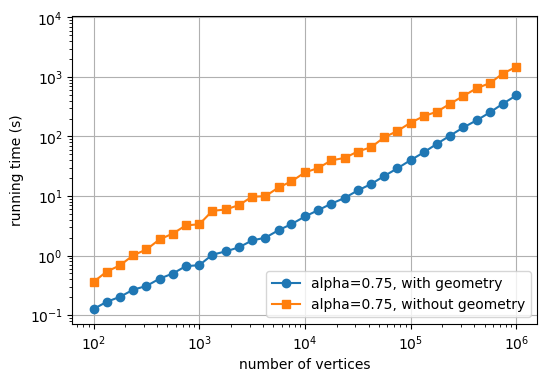

In [14]:
# plot the result (log-log scale)
plt.figure(figsize=(6, 4))

markers = ["o", "s"]

for i in range(len(versions)):
    for j in range(len(alpha_set)):
        plt.plot(num_vertices_set, time_result[(i)*len(alpha_set)+j], label="alpha={}, {}".format(alpha_set_label[j], versions_label[i]), marker=markers[(i)*len(alpha_set)+j], linestyle="-")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("number of vertices")
plt.ylabel("running time (s)")
plt.ylim(7.05e-2, 1.05e4)
plt.legend(loc=4)
# plt.grid(True, which="both", ls="-");
plt.grid(True);
plt.show()
